# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports Base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Tensorflow
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularizers
from keras.regularizers import l1, l2
# This code is neccessary to produce the same results every time
import tensorflow as tf
tf.keras.utils.set_random_seed(1)



---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
df_applicant_data = pd.read_csv(
    Path('../data/applicants_data.csv')
)

# Review the DataFrame
rows = 5
display(df_applicant_data.head(rows))
display(df_applicant_data.tail(rows))


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,996086871,WATERHOUSE CHARITABLE TR,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


In [3]:
# Review the data types associated with the columns
df_applicant_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
drop_columns = ['EIN','NAME']
df_applicant_data = df_applicant_data.drop(columns = drop_columns).copy()

# Review the DataFrame
rows = 5
display(df_applicant_data.head(rows))
display(df_applicant_data.tail(rows))


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


### Step 2a: Exploritory Data Analysis (EDA)

#### Part 1: Numerical Variables   

##### A. Summary Statisitics (describe())   

In [5]:
# Summary Statistics
df_applicant_data_stats = df_applicant_data.describe()
df_applicant_data_stats['ASK_AMT'] = df_applicant_data_stats['ASK_AMT'].map('${:,.0f}'.format)
df_applicant_data_stats


,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,"$34,299",34299.000000
mean,0.999854,"$2,769,199",0.532406
std,0.012073,"$87,130,452",0.498956
min,0.000000,"$5,000",0.000000
25%,1.000000,"$5,000",0.000000
50%,1.000000,"$5,000",1.000000
75%,1.000000,"$7,742",1.000000
max,1.000000,"$8,597,806,340",1.000000


> **Points of Interest:** 
>  1. Max Amount max = $8B --> Outliners
>  2. Status 25% = 1 --> Check Balance
>  3. Is Successful 50% = 1 --> Check Balance

##### B. Outliers: Ask Amount

array([[<AxesSubplot: title={'center': 'ASK_AMT'}>]], dtype=object)

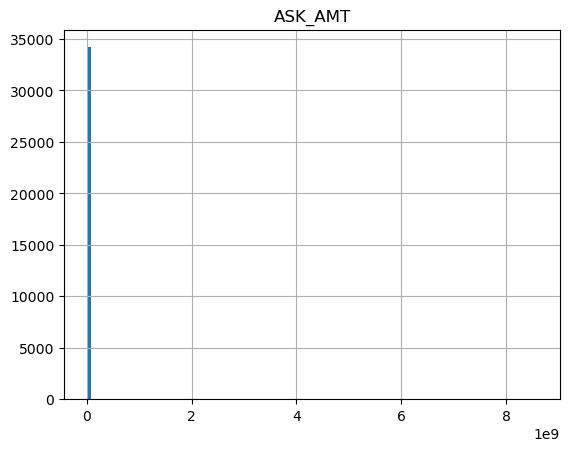

In [6]:
df_applicant_data.hist(column='ASK_AMT', bins=100, grid=True)

In [7]:
# Catigorize Ask Amount
df_Ask_Amt_Group = pd.DataFrame(df_applicant_data['ASK_AMT'])
df_Ask_Amt_Group['Ask_Amt_Group'] = 'Minimum'
df_Ask_Amt_Group.loc[df_Ask_Amt_Group['ASK_AMT'] > 5000, 'Ask_Amt_Group'] = 'Minimum_50K'
df_Ask_Amt_Group.loc[df_Ask_Amt_Group['ASK_AMT'] > 50000, 'Ask_Amt_Group'] = '50K_100K'
df_Ask_Amt_Group.loc[df_Ask_Amt_Group['ASK_AMT'] > 100000, 'Ask_Amt_Group'] = '100K_1M'
df_Ask_Amt_Group.loc[df_Ask_Amt_Group['ASK_AMT'] > 1000000, 'Ask_Amt_Group'] = '1M_More'

df_Ask_Amt_Group['Ask_Amt_Group'].value_counts()


Minimum        25398
100K_1M         2954
Minimum_50K     2947
1M_More         1577
50K_100K        1423
Name: Ask_Amt_Group, dtype: int64

> Conclusion: Add categotical variable Ask Amount Group 

##### B. Value Counts: Status

In [8]:
df_applicant_data['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

> Conclusion: Drop Column 

##### C. Value Counts: IS_SUCCESSFUL (Target Variable)

In [9]:
df_applicant_data['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

> Conclusion: Balanced Data Set

#### Part 2: Categorical Variables

##### A. Count Values

In [10]:
# Create a list of categorical variables 
categorical_variables = list(df_applicant_data.dtypes[df_applicant_data.dtypes == "object"].index)

for variable in categorical_variables:
    print(f'{variable} Counts: \n{df_applicant_data[variable].value_counts()} \n')


APPLICATION_TYPE Counts: 
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64 

AFFILIATION Counts: 
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64 

CLASSIFICATION Counts: 
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64 

USE_CASE Counts: 
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64 

ORGANIZATION Counts: 
Trust           23515
Association     10255
Co-operative      486
Corporation  

> **Actions:**
>   1. APPLICATION_TYPE       --> Convert Counts < 500 into "OTHER"
>   2. AFFILIATION            --> Convert Counts < 500 into "OTHER"
>   3. CLASSIFICATION         --> Explore Further --> Consolodate 1's
>   4. USE_CASE               --> Do Nothing
>   5. ORGANIZATION           --> Do Nothing
>   6. INCOME_AMT             --> Relable 0 to NONE
>   7. SPECIAL_CONSIDERATIONS --> Drop Imbalanced
>   8. Ask_Amt_Group          --> New category

##### B. Value Counts: CLASSIFICATION 

In [11]:
# Catigorize Ask Amount
df_classification_count = pd.DataFrame(df_applicant_data['CLASSIFICATION'].value_counts())
df_classification_count.describe()
#df_classification_count.hist(column='CLASSIFICATION', bins=10, grid=True)

,CLASSIFICATION
count,71.000000
mean,483.084507
std,2242.207852
min,1.000000
25%,1.000000
50%,5.000000
75%,32.000000
max,17326.000000


> **CLASSIFICATION:** These should be summarized. Consult with Subject Mater Expert (SME) later.

#### Part 3: Create New Application Data Dataframe

##### A. Create a new Data Frame: `df_applicant_data_revA`

In [12]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
df_applicant_data_revA = df_applicant_data.copy()

# Review the DataFrame
rows = 5
display(df_applicant_data.head(rows))
display(df_applicant_data.tail(rows))


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


##### B. Replace `ASK_AMT` a new categorical variable `Ask_Amt_Group`

In [13]:
# Catigorize Ask Amount
# Add new Ask_Amt_Group Column and set values
df_applicant_data_revA['Ask_Amt_Group'] = 'Minimum'
df_applicant_data_revA.loc[df_applicant_data_revA['ASK_AMT'] > 5000, 'Ask_Amt_Group'] = 'Minimum_50K'
df_applicant_data_revA.loc[df_applicant_data_revA['ASK_AMT'] > 50000, 'Ask_Amt_Group'] = '50K_100K'
df_applicant_data_revA.loc[df_applicant_data_revA['ASK_AMT'] > 100000, 'Ask_Amt_Group'] = '100K_1M'
df_applicant_data_revA.loc[df_applicant_data_revA['ASK_AMT'] > 1000000, 'Ask_Amt_Group'] = '1M_More'

# Drop Ask Amount Column
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['ASK_AMT'])
df_applicant_data_revA

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,Ask_Amt_Group
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,Minimum
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100K_1M
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,Minimum
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,Minimum_50K
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100K_1M
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,0,Minimum
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,Minimum
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,0,Minimum
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,1,Minimum


##### C. Drop `STATUS` column --> Imbalanced

In [14]:
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['STATUS'])
df_applicant_data_revA

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,Ask_Amt_Group
0,T10,Independent,C1000,ProductDev,Association,0,N,1,Minimum
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,1,100K_1M
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,0,Minimum
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,1,Minimum_50K
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,1,100K_1M
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,0,Minimum
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,0,Minimum
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,0,Minimum
34297,T5,Independent,C3000,ProductDev,Association,0,N,1,Minimum


##### D. Summarize `APPLICATION_TYPE` --> Set Counts < 100 = Other

In [15]:
# Create Look Up Dataframe
df_application_type_count = pd.DataFrame(df_applicant_data_revA['APPLICATION_TYPE'].value_counts())
df_application_type_count['New_App_Type'] = np.where(df_application_type_count['APPLICATION_TYPE'] < 100, 
                                                     'OTHER',
                                                     df_application_type_count.index)
display(df_application_type_count)

# Create and populate new Application Type Variable
df_applicant_data_revA['APPLICATION_TYPE_New'] = df_applicant_data_revA['APPLICATION_TYPE'].map(df_application_type_count['New_App_Type'])

print(f'APPLICATION_TYPE_New Counts: \n{df_applicant_data_revA["APPLICATION_TYPE_New"].value_counts()} \n')

# Drop old Application Type column
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['APPLICATION_TYPE'])

display(df_applicant_data_revA)


,APPLICATION_TYPE,New_App_Type
T3,27037,T3
T4,1542,T4
T6,1216,T6
T5,1173,T5
T19,1065,T19
T8,737,T8
T7,725,T7
T10,528,T10
T9,156,T9
T13,66,OTHER


APPLICATION_TYPE_New Counts: 
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
OTHER      120
Name: APPLICATION_TYPE_New, dtype: int64 



,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,Ask_Amt_Group,APPLICATION_TYPE_New
0,Independent,C1000,ProductDev,Association,0,N,1,Minimum,T10
1,Independent,C2000,Preservation,Co-operative,1-9999,N,1,100K_1M,T3
2,CompanySponsored,C3000,ProductDev,Association,0,N,0,Minimum,T5
3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,1,Minimum_50K,T3
4,Independent,C1000,Heathcare,Trust,100000-499999,N,1,100K_1M,T3
...,...,...,...,...,...,...,...,...,...
34294,Independent,C1000,ProductDev,Association,0,N,0,Minimum,T4
34295,CompanySponsored,C3000,ProductDev,Association,0,N,0,Minimum,T4
34296,CompanySponsored,C2000,Preservation,Association,0,N,0,Minimum,T3
34297,Independent,C3000,ProductDev,Association,0,N,1,Minimum,T5


##### E. Summarize `AFFILIATION` --> Set Counts < 1000 = Other

In [16]:
# Create Look Up Dataframe
df_affiliation_count = pd.DataFrame(df_applicant_data_revA['AFFILIATION'].value_counts())
df_affiliation_count['New_Affiliation'] = np.where(df_affiliation_count['AFFILIATION'] < 1000, 
                                                     'OTHER',
                                                     df_affiliation_count.index)
display(df_affiliation_count)

# Create and populate new Application Type Variable
df_applicant_data_revA['AFFILIATION_New'] = df_applicant_data_revA['AFFILIATION'].map(df_affiliation_count['New_Affiliation'])

print(f'AFFILIATION Counts: \n{df_applicant_data_revA["AFFILIATION_New"].value_counts()} \n')

# Drop old Application Type column
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['AFFILIATION'])

display(df_applicant_data_revA)


,AFFILIATION,New_Affiliation
Independent,18480,Independent
CompanySponsored,15705,CompanySponsored
Family/Parent,64,OTHER
National,33,OTHER
Regional,13,OTHER
Other,4,OTHER


AFFILIATION Counts: 
Independent         18480
CompanySponsored    15705
OTHER                 114
Name: AFFILIATION_New, dtype: int64 



,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,Ask_Amt_Group,APPLICATION_TYPE_New,AFFILIATION_New
0,C1000,ProductDev,Association,0,N,1,Minimum,T10,Independent
1,C2000,Preservation,Co-operative,1-9999,N,1,100K_1M,T3,Independent
2,C3000,ProductDev,Association,0,N,0,Minimum,T5,CompanySponsored
3,C2000,Preservation,Trust,10000-24999,N,1,Minimum_50K,T3,CompanySponsored
4,C1000,Heathcare,Trust,100000-499999,N,1,100K_1M,T3,Independent
...,...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,0,N,0,Minimum,T4,Independent
34295,C3000,ProductDev,Association,0,N,0,Minimum,T4,CompanySponsored
34296,C2000,Preservation,Association,0,N,0,Minimum,T3,CompanySponsored
34297,C3000,ProductDev,Association,0,N,1,Minimum,T5,Independent


##### F. Drop `SPECIAL_CONSIDERATIONS` column --> Imbalanced

In [17]:
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['SPECIAL_CONSIDERATIONS'])
df_applicant_data_revA


,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL,Ask_Amt_Group,APPLICATION_TYPE_New,AFFILIATION_New
0,C1000,ProductDev,Association,0,1,Minimum,T10,Independent
1,C2000,Preservation,Co-operative,1-9999,1,100K_1M,T3,Independent
2,C3000,ProductDev,Association,0,0,Minimum,T5,CompanySponsored
3,C2000,Preservation,Trust,10000-24999,1,Minimum_50K,T3,CompanySponsored
4,C1000,Heathcare,Trust,100000-499999,1,100K_1M,T3,Independent
...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,0,0,Minimum,T4,Independent
34295,C3000,ProductDev,Association,0,0,Minimum,T4,CompanySponsored
34296,C2000,Preservation,Association,0,0,Minimum,T3,CompanySponsored
34297,C3000,ProductDev,Association,0,1,Minimum,T5,Independent


##### G. Replace 0 with NONE in `INCOME_AMT` column

In [18]:
df_applicant_data_revA['INCOME_AMT_New'] = np.where((df_applicant_data_revA['INCOME_AMT'] == '0'), 'NONE',  df_applicant_data_revA['INCOME_AMT'])

df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['INCOME_AMT'])
df_applicant_data_revA
                             

,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Ask_Amt_Group,APPLICATION_TYPE_New,AFFILIATION_New,INCOME_AMT_New
0,C1000,ProductDev,Association,1,Minimum,T10,Independent,NONE
1,C2000,Preservation,Co-operative,1,100K_1M,T3,Independent,1-9999
2,C3000,ProductDev,Association,0,Minimum,T5,CompanySponsored,NONE
3,C2000,Preservation,Trust,1,Minimum_50K,T3,CompanySponsored,10000-24999
4,C1000,Heathcare,Trust,1,100K_1M,T3,Independent,100000-499999
...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,0,Minimum,T4,Independent,NONE
34295,C3000,ProductDev,Association,0,Minimum,T4,CompanySponsored,NONE
34296,C2000,Preservation,Association,0,Minimum,T3,CompanySponsored,NONE
34297,C3000,ProductDev,Association,1,Minimum,T5,Independent,NONE


##### H. Consolodate `CLASSIFICATION` in a new column --> 1 to 9 counts and 10 to 99

In [19]:
# Create Look Up Dataframe
df_classification_count = pd.DataFrame(df_applicant_data_revA['CLASSIFICATION'].value_counts())
df_classification_count['New_Classification'] = df_classification_count.index

# Group Under 100
#df_classification_count['New_Classification'] = np.where(df_classification_count['CLASSIFICATION']  < 100,
#                                                         'OTHER_100', 
#                                                         df_classification_count['New_Classification'])
# Group Under 10
df_classification_count['New_Classification'] = np.where(df_classification_count['CLASSIFICATION'] < 10, 
                                                         'OTHER_10',
                                                         df_classification_count['New_Classification'])
display(df_classification_count)

# Create and populate new CLASSIFICATION  Variable
df_applicant_data_revA['CLASSIFICATION_New'] = df_applicant_data_revA['CLASSIFICATION'].map(df_classification_count['New_Classification'])

print(f'CLASSIFICATION Counts: \n{df_applicant_data_revA["CLASSIFICATION_New"].value_counts()} \n')

# Drop old CLASSIFICATION column
df_applicant_data_revA = df_applicant_data_revA.drop(columns = ['CLASSIFICATION'])

display(df_applicant_data_revA)


,CLASSIFICATION,New_Classification
C1000,17326,C1000
C2000,6074,C2000
C1200,4837,C1200
C3000,1918,C3000
C2100,1883,C2100
...,...,...
C4120,1,OTHER_10
C8210,1,OTHER_10
C2561,1,OTHER_10
C4500,1,OTHER_10


CLASSIFICATION Counts: 
C1000       17326
C2000        6074
C1200        4837
C3000        1918
C2100        1883
C7000         777
C1700         287
C4000         194
C5000         116
C1270         114
C2700         104
OTHER_10       98
C2800          95
C7100          75
C1300          58
C1280          50
C1230          36
C1400          34
C7200          32
C2300          32
C1240          30
C8000          20
C7120          18
C1500          16
C1800          15
C6000          15
C1250          14
C8200          11
C1238          10
C1278          10
Name: CLASSIFICATION_New, dtype: int64 



,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Ask_Amt_Group,APPLICATION_TYPE_New,AFFILIATION_New,INCOME_AMT_New,CLASSIFICATION_New
0,ProductDev,Association,1,Minimum,T10,Independent,NONE,C1000
1,Preservation,Co-operative,1,100K_1M,T3,Independent,1-9999,C2000
2,ProductDev,Association,0,Minimum,T5,CompanySponsored,NONE,C3000
3,Preservation,Trust,1,Minimum_50K,T3,CompanySponsored,10000-24999,C2000
4,Heathcare,Trust,1,100K_1M,T3,Independent,100000-499999,C1000
...,...,...,...,...,...,...,...,...
34294,ProductDev,Association,0,Minimum,T4,Independent,NONE,C1000
34295,ProductDev,Association,0,Minimum,T4,CompanySponsored,NONE,C3000
34296,Preservation,Association,0,Minimum,T3,CompanySponsored,NONE,C2000
34297,ProductDev,Association,1,Minimum,T5,Independent,NONE,C3000


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

#### A. Encode Origional `df_applicant_data` Dataset 

In [20]:
# Create a list of categorical variables 
categorical_variables = list(df_applicant_data.dtypes[df_applicant_data.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)


In [22]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(df_applicant_data[categorical_variables])


In [23]:
# Create a DataFrame with the encoded variables
df_encoded = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame
rows = 5
display(df_encoded.head(rows))
display(df_encoded.tail(rows))


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### B. Encode New `df_applicant_data_revA` Dataset 

In [24]:
# Create a list of categorical variables 
categorical_variables_revA = list(df_applicant_data_revA.dtypes[df_applicant_data_revA.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_revA


['USE_CASE',
 'ORGANIZATION',
 'Ask_Amt_Group',
 'APPLICATION_TYPE_New',
 'AFFILIATION_New',
 'INCOME_AMT_New',
 'CLASSIFICATION_New']

In [25]:
# Create a OneHotEncoder instance
enc_revA = OneHotEncoder(sparse_output=False)


In [26]:
# Encode the categorcal variables using OneHotEncoder
encoded_data_revA = enc_revA.fit_transform(df_applicant_data_revA[categorical_variables_revA])


In [27]:
# Create a DataFrame with the encoded variables
df_encoded_revA = pd.DataFrame(
    encoded_data_revA,
    columns = enc_revA.get_feature_names_out(categorical_variables_revA)
)

# Review the DataFrame
rows = 5
display(df_encoded_revA.head(rows))
display(df_encoded_revA.tail(rows))


,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Ask_Amt_Group_100K_1M,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Ask_Amt_Group_100K_1M,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
34294,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34298,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

#### A. Concatinate Origional `df_applicant_data` Dataset 

In [28]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
df_numerical_variables = df_applicant_data.drop(columns = categorical_variables)

# Review the DataFrame
df_numerical_variables.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [29]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
df_encoded = pd.concat([df_numerical_variables, df_encoded], axis=1)

# Review the Dataframe
rows = 5
display(df_encoded.head(rows))
display(df_encoded.tail(rows))


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### B. Concatinate New `df_applicant_data_revA` Dataset 

In [30]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
df_numerical_variables_revA = df_applicant_data_revA.drop(columns = categorical_variables_revA)

# Review the DataFrame
df_numerical_variables_revA.head()

,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


In [31]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
df_encoded_revA = pd.concat([df_numerical_variables_revA, df_encoded_revA], axis=1)

# Review the Dataframe
rows = 5
display(df_encoded_revA.head(rows))
display(df_encoded_revA.tail(rows))


,IS_SUCCESSFUL,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,IS_SUCCESSFUL,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
34294,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34298,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



#### A. Create features and target for Origional `df_applicant_data` Dataset 

In [32]:
# Define the target set y using the IS_SUCCESSFUL column
y_variable = ["IS_SUCCESSFUL"]
y = df_encoded[y_variable]

# Display a sample of y
rows = 5
display(y.head(rows))
display(y.tail(rows))


,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


,IS_SUCCESSFUL
34294,0
34295,0
34296,0
34297,1
34298,0


In [33]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = df_encoded.drop(columns = y_variable)

# Review the features DataFrame
rows = 5
display(X.head(rows))
display(X.tail(rows))


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### B. Create features and targert for New `df_applicant_data_revA` Dataset 

In [34]:
# Define the target set y using the IS_SUCCESSFUL column
y_variable_revA = ["IS_SUCCESSFUL"]
y_revA = df_encoded_revA[y_variable_revA]

# Display a sample of y
rows = 5
display(y_revA.head(rows))
display(y_revA.tail(rows))


,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


,IS_SUCCESSFUL
34294,0
34295,0
34296,0
34297,1
34298,0


In [35]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X_revA = df_encoded_revA.drop(columns = y_variable_revA)

# Review the features DataFrame
rows = 5
display(X_revA.head(rows))
display(X_revA.tail(rows))


,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Ask_Amt_Group_100K_1M,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Ask_Amt_Group_100K_1M,...,CLASSIFICATION_New_C4000,CLASSIFICATION_New_C5000,CLASSIFICATION_New_C6000,CLASSIFICATION_New_C7000,CLASSIFICATION_New_C7100,CLASSIFICATION_New_C7120,CLASSIFICATION_New_C7200,CLASSIFICATION_New_C8000,CLASSIFICATION_New_C8200,CLASSIFICATION_New_OTHER_10
34294,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34298,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


#### A. Split features and targert for Origional `df_applicant_data` Dataset 

In [36]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Displa the data fram splits
print(f'Encoded Dataframe: {df_encoded.shape}')
print('\nTraining Data (75%):')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

print('\nTesting Data (25%):')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

Encoded Dataframe: (34299, 117)

Training Data (75%):
X_train shape: (25724, 116)
y_train shape: (25724, 1)

Testing Data (25%):
X_test shape: (8575, 116)
y_test shape: (8575, 1)


#### B. Split features and targert for New `df_applicant_data_revA` Dataset 

In [37]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train_revA, X_test_revA, y_train_revA, y_test_revA = train_test_split(X_revA, y_revA, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

#### A. Scale features and targert for Origional `df_applicant_data` Dataset 

In [38]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


#### B. Scale features and targert for New `df_applicant_data_revA` Dataset 

In [39]:
# Create a StandardScaler instance
scaler_revA = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler_revA = scaler_revA.fit(X_train_revA)

# Fit the scaler to the features training dataset
X_train_scaled_revA = X_scaler_revA.transform(X_train_revA)
X_test_scaled_revA = X_scaler_revA.transform(X_test_revA)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [40]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features


116

In [41]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [42]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [43]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


29

In [44]:
# Create the Sequential model instance
nn = Sequential()

In [45]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, 
             input_dim=number_input_features, 
             activation="relu"))


In [46]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, 
             activation="relu"))


In [47]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))


In [48]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [49]:
# Epochs as a variable (development = 50; pre-production = 1000)
number_of_epochs = 100 
batch_size = 10000

In [50]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", 
           optimizer="adam", 
           metrics=["accuracy"])


In [51]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, 
                   y_train, 
                   epochs=number_of_epochs,
                   batch_size = batch_size,
                   validation_split = 0.2,
                   shuffle = True, 
                   #verbose = 0
                   )


Epoch 1/100
3/3 [==============================] - 1s 90ms/step - loss: 0.7193 - accuracy: 0.5084 - val_loss: 0.6995 - val_accuracy: 0.5073
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6895 - accuracy: 0.5302 - val_loss: 0.6756 - val_accuracy: 0.6210
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6684 - accuracy: 0.6229 - val_loss: 0.6575 - val_accuracy: 0.6844
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6516 - accuracy: 0.6793 - val_loss: 0.6432 - val_accuracy: 0.6993
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6377 - accuracy: 0.6909 - val_loss: 0.6314 - val_accuracy: 0.7071
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6259 - accuracy: 0.6962 - val_loss: 0.6220 - val_accuracy: 0.7098
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6160 - accuracy: 0.7013 - val_loss: 0.6141 - val_accuracy: 0.7125
Epoch 8/100
3/3 [===

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [52]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =  nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5532 - accuracy: 0.7284 - 223ms/epoch - 831us/step
Loss: 0.5531885027885437, Accuracy: 0.728396475315094


<AxesSubplot: title={'center': 'Loss'}, xlabel='Epoch'>

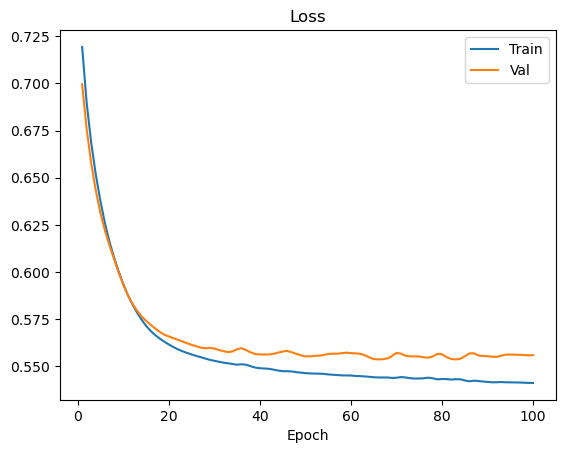

In [53]:
# Plotting loss
df_loss = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model.history["loss"],
        "Val": fit_model.history["val_loss"],
    }
)
df_loss.set_index("Epoch", inplace=True)
df_loss.plot(title="Loss")


<AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epoch'>

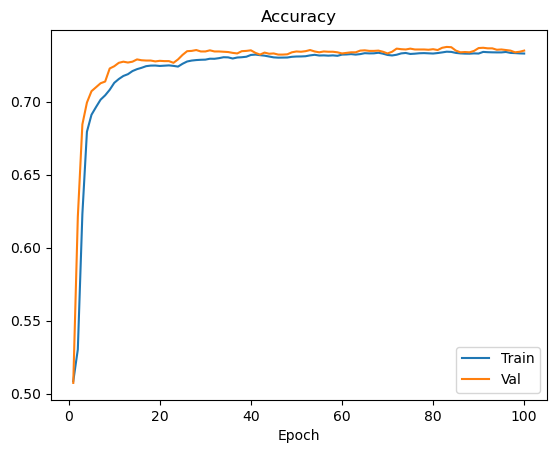

In [54]:
# Plotting accuracy
df_accuracy = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model.history["accuracy"],
        "Val": fit_model.history["val_accuracy"],
    }
)
df_accuracy.set_index("Epoch", inplace=True)
df_accuracy.plot(title="Accuracy")


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [55]:
# Set the model's file path
file_path = Path("../data/AlphabetSoup.h5")

# Export your model to a HDF5 file
nn.save(file_path)


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1 - Add Additional Hidden Layer

In [56]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [57]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [58]:
# Define the number of hidden nodes for the first hidden layer
# 50% of features
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [59]:
# Define the number of hidden nodes for the first hidden layer
# 25% of features
hidden_nodes_layer2_A1 = (hidden_nodes_layer1_A1 + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A1

29

In [60]:
# Define the number of hidden nodes for the first hidden layer
# 12.5% of features 
hidden_nodes_layer3_A1 = (hidden_nodes_layer2_A1 + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer3_A1

15

In [61]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [62]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, 
                input_dim=number_input_features, 
                activation="relu"))

# First dropout layer
nn_A1.add(Dropout(.2,input_shape=(10,)))

# Second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, 
                activation="relu"))

# Third hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, 
                activation="relu"))

# Output layer
nn_A1.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense_4 (Dense)             (None, 29)                1711      
                                                                 
 dense_5 (Dense)             (None, 15)                450       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 8,963
Trainable params: 8,963
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=[
                  "accuracy",
#                  tf.keras.metrics.TruePositives(name="tp"),
#                  tf.keras.metrics.TrueNegatives(name="tn"),
#                  tf.keras.metrics.FalsePositives(name="fp"),
#                  tf.keras.metrics.FalseNegatives(name="fn"),
#                  tf.keras.metrics.Precision(name="precision"),
#                  tf.keras.metrics.Recall(name="recall"),
#                  tf.keras.metrics.AUC(name="auc"),
    ],)

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, 
                         y_train, 
                         epochs = number_of_epochs,
                         batch_size = batch_size,
                         validation_split = 0.2,
                         shuffle = True,
                         #verbose = 0
                        )


Epoch 1/100
3/3 [==============================] - 1s 76ms/step - loss: 0.7426 - accuracy: 0.5169 - val_loss: 0.7047 - val_accuracy: 0.5677
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.7042 - accuracy: 0.5632 - val_loss: 0.6799 - val_accuracy: 0.6200
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6823 - accuracy: 0.6050 - val_loss: 0.6646 - val_accuracy: 0.6610
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6716 - accuracy: 0.6279 - val_loss: 0.6530 - val_accuracy: 0.6698
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6610 - accuracy: 0.6450 - val_loss: 0.6431 - val_accuracy: 0.6896
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6506 - accuracy: 0.6582 - val_loss: 0.6339 - val_accuracy: 0.6982
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6412 - accuracy: 0.6762 - val_loss: 0.6247 - val_accuracy: 0.7042
Epoch 8/100
3/3 [===

In [65]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A1, model_accuracy_A1 =  nn_A1.evaluate(X_test_scaled,y_test,verbose=2)
#model_loss_A1, model_accuracy_A1, tp_A1, tn_A1, fp_A1, fn_A1, precision_A1, recall_A1, auc_A1 =  nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

268/268 - 0s - loss: 0.5551 - accuracy: 0.7279 - 223ms/epoch - 832us/step
Loss: 0.5551437139511108, Accuracy: 0.7279300093650818


<AxesSubplot: title={'center': 'Loss'}, xlabel='Epoch'>

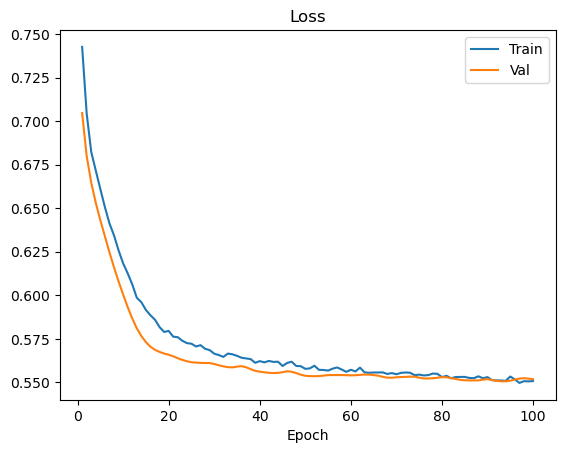

In [66]:
# Plotting loss
df_loss_A1 = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model_A1.history["loss"],
        "Val": fit_model_A1.history["val_loss"],
    }
)
df_loss_A1.set_index("Epoch", inplace=True)
df_loss_A1.plot(title="Loss")


<AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epoch'>

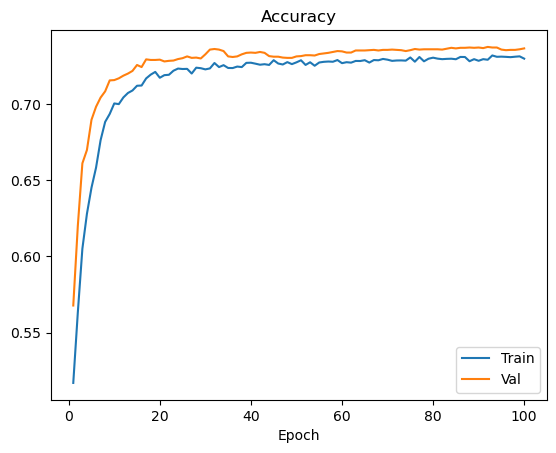

In [67]:
# Plotting accuracy
df_accuracy_A1 = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model_A1.history["accuracy"],
        "Val": fit_model_A1.history["val_accuracy"],
    }
)
df_accuracy_A1.set_index("Epoch", inplace=True)
df_accuracy_A1.plot(title="Accuracy")


#### Alternative Model 2 - Apply Feature Engineering to Origional Data Set

In [68]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train_revA.iloc[0])

# Review the number of features
number_input_features

66

In [69]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [70]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features + 1) // 2 

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

33

In [71]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer1_A2 = (hidden_nodes_layer1_A2 + 1) // 2 

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

17

In [72]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [73]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, 
                input_dim=number_input_features, 
                activation="relu"))

# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, 
                activation="relu"))

# Output layer
nn_A2.add(Dense(units=1, 
                activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 17)                1139      
                                                                 
 dense_8 (Dense)             (None, 17)                306       
                                                                 
 dense_9 (Dense)             (None, 1)                 18        
                                                                 
Total params: 1,463
Trainable params: 1,463
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


In [75]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled_revA, 
                         y_train_revA, 
                         epochs=number_of_epochs,
                         batch_size = batch_size,
                         validation_split = 0.2,
                         shuffle = True, 
                         #verbose = 0
                         )


Epoch 1/100
3/3 [==============================] - 1s 73ms/step - loss: 0.7627 - accuracy: 0.4572 - val_loss: 0.7500 - val_accuracy: 0.4330
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7397 - accuracy: 0.4479 - val_loss: 0.7302 - val_accuracy: 0.4385
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7213 - accuracy: 0.4516 - val_loss: 0.7141 - val_accuracy: 0.4618
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7070 - accuracy: 0.5077 - val_loss: 0.7020 - val_accuracy: 0.5287
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6959 - accuracy: 0.5396 - val_loss: 0.6917 - val_accuracy: 0.5318
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6864 - accuracy: 0.5431 - val_loss: 0.6828 - val_accuracy: 0.5425
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6783 - accuracy: 0.5505 - val_loss: 0.6749 - val_accuracy: 0.5547
Epoch 8/100
3/3 [===

In [76]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A2, model_accuracy_A2 =  nn_A2.evaluate(X_test_scaled_revA, y_test_revA, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.7271 - 253ms/epoch - 946us/step
Loss: 0.5590491890907288, Accuracy: 0.7271137237548828


<AxesSubplot: title={'center': 'Loss'}, xlabel='Epoch'>

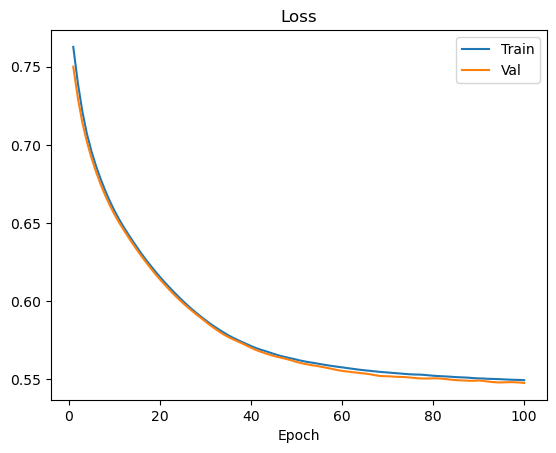

In [77]:
# Plotting loss
df_loss_A2 = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model_A2.history["loss"],
        "Val": fit_model_A2.history["val_loss"],
    }
)
df_loss_A2.set_index("Epoch", inplace=True)
df_loss_A2.plot(title="Loss")


<AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epoch'>

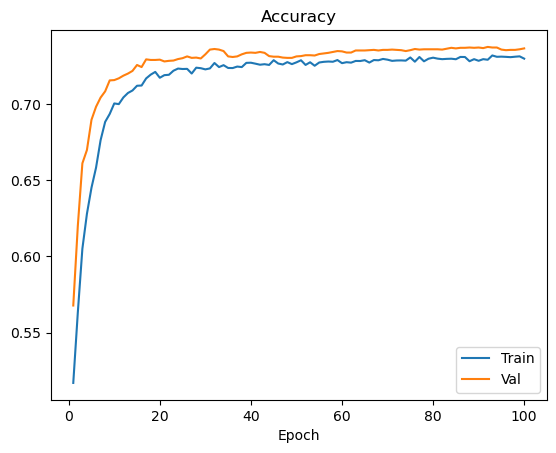

In [78]:
# Plotting accuracy
df_accuracy_A1 = pd.DataFrame(
    {
        "Epoch": range(1, number_of_epochs + 1),
        "Train": fit_model_A1.history["accuracy"],
        "Val": fit_model_A1.history["val_accuracy"],
    }
)
df_accuracy_A1.set_index("Epoch", inplace=True)
df_accuracy_A1.plot(title="Accuracy")


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [79]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5532 - accuracy: 0.7284 - 223ms/epoch - 834us/step
Loss: 0.5531885027885437, Accuracy: 0.728396475315094


In [80]:
# Save model history across epochs
nn_history = fit_model.history
nn_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot: title={'center': 'Accuracy Across Training and Validation - Base Model'}>

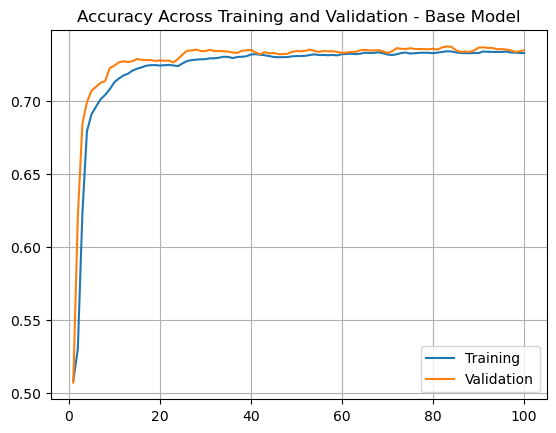

In [81]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = nn_history['accuracy']
training_results['Validation'] = nn_history['val_accuracy']
training_results.plot(title = 'Accuracy Across Training and Validation - Base Model', grid = True)


In [82]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5551 - accuracy: 0.7279 - 233ms/epoch - 870us/step
Loss: 0.5551437139511108, Accuracy: 0.7279300093650818


In [83]:
nn_A1_history = fit_model_A1.history
nn_A1_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot: title={'center': 'Accuracy Across Training and Validation - A1 Model'}>

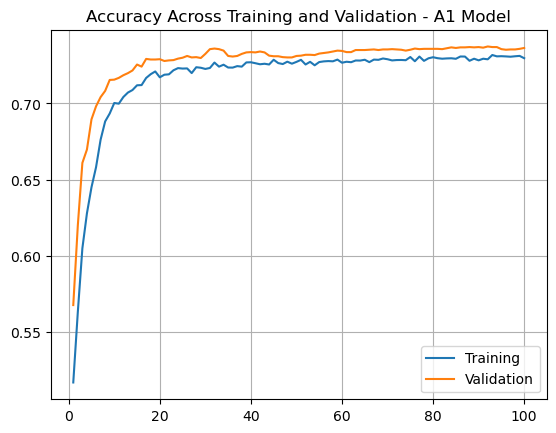

In [84]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = nn_A1_history['accuracy']
training_results['Validation'] = nn_A1_history['val_accuracy']
training_results.plot(title = 'Accuracy Across Training and Validation - A1 Model', grid = True)

In [85]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled_revA, y_test_revA, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5590 - accuracy: 0.7271 - 214ms/epoch - 800us/step
Loss: 0.5590491890907288, Accuracy: 0.7271137237548828


In [86]:
nn_A2_history = fit_model_A1.history
nn_A2_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot: title={'center': 'Accuracy Across Training and Validation - A2 Model'}>

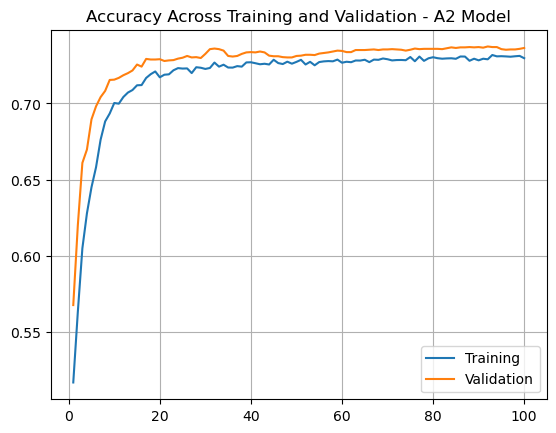

In [87]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = nn_A2_history['accuracy']
training_results['Validation'] = nn_A2_history['val_accuracy']
training_results.plot(title = 'Accuracy Across Training and Validation - A2 Model', grid = True)


### Step 3: Save each of your alternative models as an HDF5 file.


In [88]:
# Set the file path for the first alternative model
file_path = Path("../data/AlphabetSoup_A1.h5")

# Export your model to a HDF5 file
nn_A1.save(file_path)


In [89]:
# Set the file path for the second alternative model
file_path = Path("../data/AlphabetSoup_A2.h5")

# Export your model to a HDF5 file
nn_A2.save(file_path)
